In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
data=pd.read_csv("audi.csv")
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [5]:
ohe=OneHotEncoder()
le=LabelEncoder()

In [6]:
datale=data.apply(LabelEncoder().fit_transform)

In [7]:
datale

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,17,584,1,2878,2,8,80,3
1,5,16,1079,0,5462,0,1,88,8
2,0,16,402,1,4769,2,2,80,3
3,3,17,1121,0,4214,0,7,90,8
4,2,19,1176,1,342,2,7,72,1
...,...,...,...,...,...,...,...,...,...
10663,2,20,1152,1,850,2,7,72,1
10664,2,20,1152,1,336,2,8,72,1
10665,2,20,1163,1,120,2,8,72,1
10666,9,17,1469,0,1847,2,8,70,3


In [8]:
fuiltype=datale.iloc[:,5:6]

In [12]:
fuiltype.describe()

,fuelType
count,10668.000000
mean,0.951819
std,0.997571
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,2.000000


In [13]:
geartype=datale.iloc[:,3:4]

In [14]:
geartype

,transmission
0,1
1,0
2,1
3,0
4,1
...,...
10663,1
10664,1
10665,1
10666,0


In [20]:
newdata=data.drop(columns=["transmission","fuelType","model"])

In [21]:
model=datale.iloc[:,0:1]

In [22]:
model

,model
0,0
1,5
2,0
3,3
4,2
...,...
10663,2
10664,2
10665,2
10666,9


In [27]:
lastdata=pd.concat([newdata, model, fuiltype, geartype],axis=1)

In [29]:
lastdata

,year,price,mileage,tax,mpg,engineSize,model,fuelType,transmission
0,2017,12500,15735,150,55.4,1.4,0,2,1
1,2016,16500,36203,20,64.2,2.0,5,0,0
2,2016,11000,29946,30,55.4,1.4,0,2,1
3,2017,16800,25952,145,67.3,2.0,3,0,0
4,2019,17300,1998,145,49.6,1.0,2,2,1
...,...,...,...,...,...,...,...,...,...
10663,2020,16999,4018,145,49.6,1.0,2,2,1
10664,2020,16999,1978,150,49.6,1.0,2,2,1
10665,2020,17199,609,150,49.6,1.0,2,2,1
10666,2017,19499,8646,150,47.9,1.4,9,2,0


In [30]:
x=lastdata.drop(columns="price").values
y=lastdata.iloc[:,1:2].values

In [31]:
x

array([[2.0170e+03, 1.5735e+04, 1.5000e+02, ..., 0.0000e+00, 2.0000e+00,
        1.0000e+00],
       [2.0160e+03, 3.6203e+04, 2.0000e+01, ..., 5.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0160e+03, 2.9946e+04, 3.0000e+01, ..., 0.0000e+00, 2.0000e+00,
        1.0000e+00],
       ...,
       [2.0200e+03, 6.0900e+02, 1.5000e+02, ..., 2.0000e+00, 2.0000e+00,
        1.0000e+00],
       [2.0170e+03, 8.6460e+03, 1.5000e+02, ..., 9.0000e+00, 2.0000e+00,
        0.0000e+00],
       [2.0160e+03, 1.1855e+04, 1.5000e+02, ..., 9.0000e+00, 2.0000e+00,
        1.0000e+00]])

In [32]:
y

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [38]:
x_train.shape, x_test.shape

((7467, 8), (3201, 8))

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
from sklearn.linear_model import LinearRegression

In [45]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
ypredict=lr.predict(x_test)

In [48]:
ypredict

array([[13495.69799899],
       [30697.17954069],
       [31401.92391502],
       ...,
       [ 9899.62278572],
       [18364.10954774],
       [43780.31839992]])

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,ypredict)

0.7946770983774926

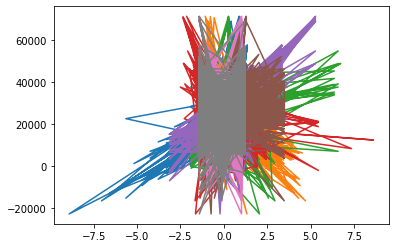

In [50]:
plt.plot(x_test,lr.predict(x_test))